In [1426]:
#import the necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from sklearn.decomposition import IncrementalPCA
from adjustText import adjust_text
%matplotlib inline

In [1427]:
#Loading the Data
fifa = pd.read_csv('Fifa 23 Players Data.csv')
fifaun = pd.read_csv('Fifa 23 Players Data.csv')
#Getting the name of columns to know which ones to drop
fifa.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [1428]:
#Checking for missing values
fifa.isnull().values.any().sum()

0

In [1429]:
#No of rows and columns
fifa.shape

(18539, 89)

In [1430]:
fifa

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [1431]:
fifa.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [1432]:
#Taking the columns that are required for the analysis
fifa = fifa[['Known As', 'Age', 'Nationality', 'Overall', 'Potential', 'Club Name', 'Value(in Euro)','Wage(in Euro)', 'Best Position','Preferred Foot']]
fifa.head()

,Known As,Age,Nationality,Overall,Potential,Club Name,Value(in Euro),Wage(in Euro),Best Position,Preferred Foot
0,L. Messi,35,Argentina,91,91,Paris Saint-Germain,54000000,195000,CAM,Left
1,K. Benzema,34,France,91,91,Real Madrid CF,64000000,450000,CF,Right
2,R. Lewandowski,33,Poland,91,91,FC Barcelona,84000000,420000,ST,Right
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,CM,Right
4,K. Mbappé,23,France,91,95,Paris Saint-Germain,190500000,230000,ST,Right


In [1433]:
#Renaming the Columns for convinience
dict = {'Known As': 'Name','Value(in Euro)': 'Value(M)','Wage(in Euro)':'Wage(K)','Best Position': 'Position','Preferred Foot': 'Foot'}
fifa.rename(columns = dict, inplace = True)
fifa.head()

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\1949191518.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Age,Nationality,Overall,Potential,Club Name,Value(M),Wage(K),Position,Foot
0,L. Messi,35,Argentina,91,91,Paris Saint-Germain,54000000,195000,CAM,Left
1,K. Benzema,34,France,91,91,Real Madrid CF,64000000,450000,CF,Right
2,R. Lewandowski,33,Poland,91,91,FC Barcelona,84000000,420000,ST,Right
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,CM,Right
4,K. Mbappé,23,France,91,95,Paris Saint-Germain,190500000,230000,ST,Right


In [1434]:
#Converting the unit of Value to M by dividng the Value column by 1000000 
fifa['Value(M)'] = fifa['Value(M)'].div(1000000).round(2)
fifa['Wage(K)'] = fifa['Wage(K)'].div(1000).round(2)
fifa.head(20)

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\3621121877.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\3621121877.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Age,Nationality,Overall,Potential,Club Name,Value(M),Wage(K),Position,Foot
0,L. Messi,35,Argentina,91,91,Paris Saint-Germain,54.0,195.0,CAM,Left
1,K. Benzema,34,France,91,91,Real Madrid CF,64.0,450.0,CF,Right
2,R. Lewandowski,33,Poland,91,91,FC Barcelona,84.0,420.0,ST,Right
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107.5,350.0,CM,Right
4,K. Mbappé,23,France,91,95,Paris Saint-Germain,190.5,230.0,ST,Right
5,M. Salah,30,Egypt,90,90,Liverpool,115.5,270.0,RW,Left
6,T. Courtois,30,Belgium,90,91,Real Madrid CF,90.0,250.0,GK,Left
7,M. Neuer,36,Germany,90,90,FC Bayern München,13.5,72.0,GK,Right
8,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,41.0,220.0,ST,Right
9,V. van Dijk,30,Netherlands,90,90,Liverpool,98.0,230.0,CB,Right


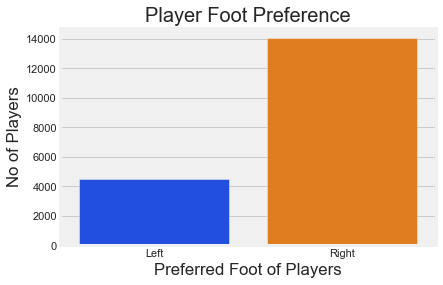

In [1435]:
#Player foot preferences
plt.figure()
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Foot', data = fifa, palette = 'bright')
ax.set_xlabel('Preferred Foot of Players')
ax.set_ylabel('No of Players')
ax.set_title(label = 'Player Foot Preference', fontsize = 20)
plt.show()

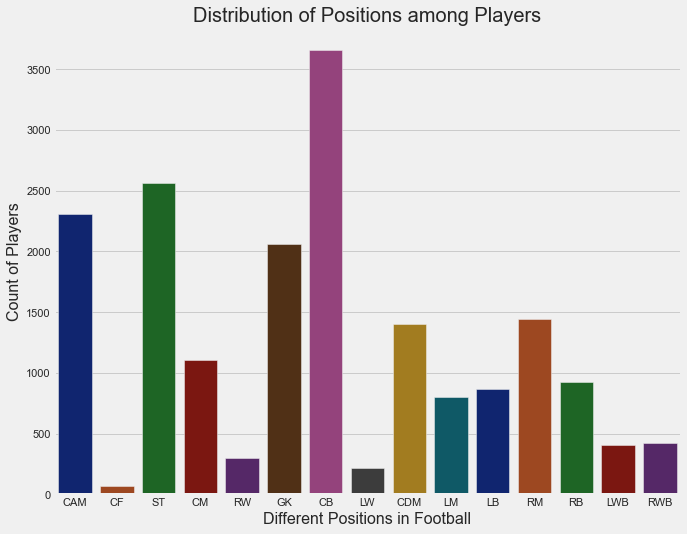

In [1436]:
#Distribution of players among position
plt.figure(figsize = (10, 8))
ax1 = sns.countplot(x='Position', data = fifa, palette = 'dark')
ax1.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax1.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax1.set_title(label = 'Distribution of Positions among Players', fontsize = 20)
plt.show()

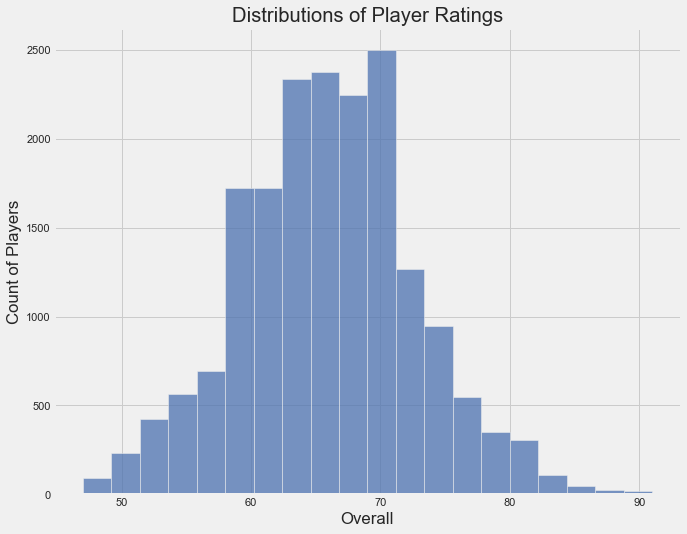

In [1437]:
#Distribution of players among ratings
plt.figure(figsize=(10,8))
ax2 = sns.histplot(data.Overall, bins=20);
ax2.set_title('Distributions of Player Ratings')
ax2.set_xlabel('Overall');
ax2.set_ylabel('Count of Players')
plt.show()

Text(0.5, 1.0, 'Average Rating by Age')

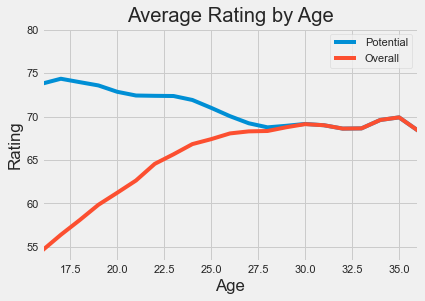

In [1438]:
#Average rating by Age
fifa_p = fifa.groupby(['Age'])['Potential'].mean()
fifa_o = fifa.groupby(['Age'])['Overall'].mean()
fifa_summary = pd.concat([fifa_p, fifa_o], axis=1)
ax3 = fifa_summary.plot()
ax3.set_xlabel('Age')
ax3.set_xlim(16,36)
ax3.set_ylabel('Rating')
ax3.set_title('Average Rating by Age')

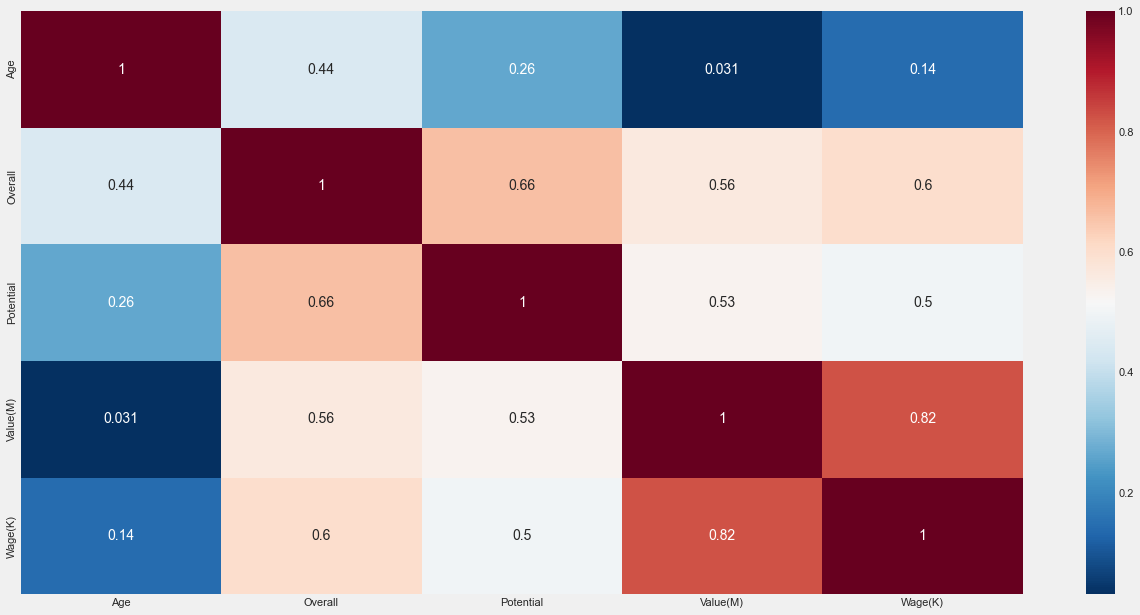

In [1439]:
#heatmap for corelation
corr_matrix = fifa.corr().abs()
plt.figure(figsize=(20,10))
ax4 = sns.heatmap(corr_matrix, cmap = 'RdBu_r',annot = True)

In [1440]:
#Getting the Best XI in the world 4-3-3 formation
def best_squad_fifa(Position):
    fifa_copy = fifa.copy()
    store = []
    for i in Position:
        store.append([i,fifa_copy.loc[[fifa_copy[fifa_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), fifa_copy[fifa_copy['Position'] == i]['Overall'].max()])
        fifa_copy.drop(fifa_copy[fifa_copy['Position'] == i]['Overall'].idxmax(),inplace=True)
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index=False)
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RM', 'ST', 'LM']
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'RM', 'ST', 'LM']
squad_523 = ['GK', 'RWB', 'CB', 'CB', 'CB', 'LWB', 'CM', 'CM', 'RM', 'ST', 'LM']
squad_5212 = ['GK', 'RWB', 'CB', 'CB', 'CB', 'LWB', 'CM', 'CM', 'CAM', 'ST', 'ST']
print (best_squad_fifa(squad_433))

Position         Player Overall
      GK    T. Courtois      90
      RB      K. Walker      85
      CB    V. van Dijk      90
      CB     Rúben Dias      88
      LB   João Cancelo      88
     CDM       Casemiro      89
      CM   K. De Bruyne      91
     CAM       L. Messi      91
      RM      S. Gnabry      85
      ST R. Lewandowski      91
      LM        S. Mané      89


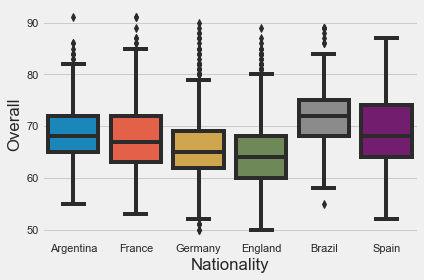

In [1441]:
#box plot for the distribution of all players in the world cup favourites
fifa = fifa[fifa['Nationality'].isin(['England', 'Germany', 'Spain', 'Argentina', 'Brazil', 'France'])]
sns.boxplot(x= fifa['Nationality'], y = fifa['Overall'])
plt.show()

In [1442]:
#Getting best squad country wise from world cup favourites
def best_squad(position, nationality, measurement = 'Overall'):
    fifa_copy1 = fifa.copy()
    fifa_copy1 = fifa_copy1[fifa_copy1['Nationality'] == nationality]
    store1 = []
    for i in position:
        store1.append([fifa_copy1.loc[[fifa_copy1[fifa_copy1['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),fifa_copy1.loc[[fifa_copy1[fifa_copy1['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), fifa_copy1[fifa_copy1['Position'].str.contains(i)][measurement].max()])
        fifa_copy1.drop(fifa_copy1[fifa_copy1['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store1]).round(2),pd.DataFrame(np.array(store1).reshape(11,3), columns = ['Position', 'Name', measurement]).to_string(index = False)

#Brazil 4-3-3
Brazil_Overall, Brazil_current_team = best_squad(squad_433, 'Brazil', 'Overall')
Brazil_Potential, Brazil_future_team = best_squad(squad_433, 'Brazil', 'Potential')
print('Brazil Team for World Cup 2022')
print('Average rating: {:.1f}'.format(Brazil_Overall))
print(Brazil_current_team)
print('Future Brazil Team')
print('Average rating: {:.1f}'.format(Brazil_Potential))
print(Brazil_future_team)

#France 5-2-1-2
France_Overall, France_current_team = best_squad(squad_5212, 'France', 'Overall')
France_Potential, France_future_team = best_squad(squad_5212, 'France', 'Potential')
print('France Team for World Cup 2022')
print('Average rating: {:.1f}'.format(France_Overall))
print(France_current_team)
print('Future French Team')
print('Average rating: {:.1f}'.format(France_Potential))
print(France_future_team)

#Argentina 4-3-3
Argentina_Overall, Argentina_current_team = best_squad(squad_433, 'Argentina', 'Overall')
Argentina_Potential, Argentina_future_team = best_squad(squad_433, 'Argentina', 'Potential')
print('Argentina Team for World Cup 2022')
print('Average rating: {:.1f}'.format(Argentina_Overall))
print(Argentina_current_team)
print('Future Argentina Team')
print('Average rating: {:.1f}'.format(Argentina_Potential))
print(Argentina_future_team)

#England 5-2-3
England_Overall, England_current_team = best_squad(squad_523, 'England', 'Overall')
England_Potential, England_future_team = best_squad(squad_523, 'England', 'Potential')
print('England Team for World Cup 2022')
print('Average rating: {:.1f}'.format(England_Overall))
print(England_current_team)
print('Future England Team')
print('Average rating: {:.1f}'.format(England_Potential))
print(England_future_team)

#Spain 4-3-3
Spain_Overall, Spain_current_team = best_squad(squad_433, 'Spain', 'Overall')
Spain_Potential, Spain_future_team = best_squad(squad_433, 'Spain', 'Potential')
print('Spain Team for World Cup 2022')
print('Average rating: {:.1f}'.format(Spain_Overall))
print(Spain_current_team)
print('Future Spain Team')
print('Average rating: {:.1f}'.format(Spain_Potential))
print(Spain_future_team)

#Germany 4-2-1-3
Germany_Overall, Germany_current_team = best_squad(squad_4231, 'Germany', 'Overall')
Germany_Potential, Germany_future_team = best_squad(squad_4231, 'Germany', 'Potential')
print('Germany Team for World Cup 2022')
print('Average rating: {:.1f}'.format(Germany_Overall))
print(Germany_current_team)
print('Future Germany Team')
print('Average rating: {:.1f}'.format(Germany_Potential))
print(Germany_future_team)

Brazil Team for World Cup 2022
Average rating: 84.1
Position            Name Overall
      GK         Ederson      89
      RB Maikel Catarino      80
      CB      Marquinhos      88
      CB    Thiago Silva      86
      LB  Welington Dano      81
     CDM        Casemiro      89
      CM Bruno Guimarães      81
     CAM   Lucas Paquetá      82
      RM Ronaldo Cabrais      83
      ST   Gabriel Jesus      83
      LM        Raphinha      83
Future Brazil Team
Average rating: 87.1
Position            Name Potential
      GK         Ederson        91
      RB Vinícius Tobías        83
      CB      Marquinhos        90
      CB    Éder Militão        89
      LB  Welington Dano        81
     CDM        Casemiro        89
      CM Bruno Guimarães        86
     CAM   Lucas Paquetá        87
      RM         Rodrygo        88
      ST   Gabriel Jesus        86
      LM          Antony        88
France Team for World Cup 2022
Average rating: 84.5
Position         Name Overall
      GK  

In [1443]:
#Average rating and Average potential rating of the best players in the above teams
by_country = fifa[fifa['Nationality'].isin(['England', 'Germany', 'Spain','Brazil','Argentina','France'])]
by_country = by_country[by_country.Overall>=85]
by_country_ov = by_country.groupby(['Nationality'])['Overall'].mean().round(2)
by_country_pot = by_country.groupby(['Nationality'])['Potential'].mean().round(2)
print(by_country_ov)
print(by_country_pot)


Nationality
Argentina    87.00
Brazil       87.88
England      86.17
France       87.20
Germany      86.83
Spain        85.70
Name: Overall, dtype: float64
Nationality
Argentina    88.00
Brazil       89.38
England      87.83
France       88.80
Germany      87.33
Spain        86.80
Name: Potential, dtype: float64


Coefficients:  [[0.83789634]]
Mean squared error: 54.18
Variance score: 0.37


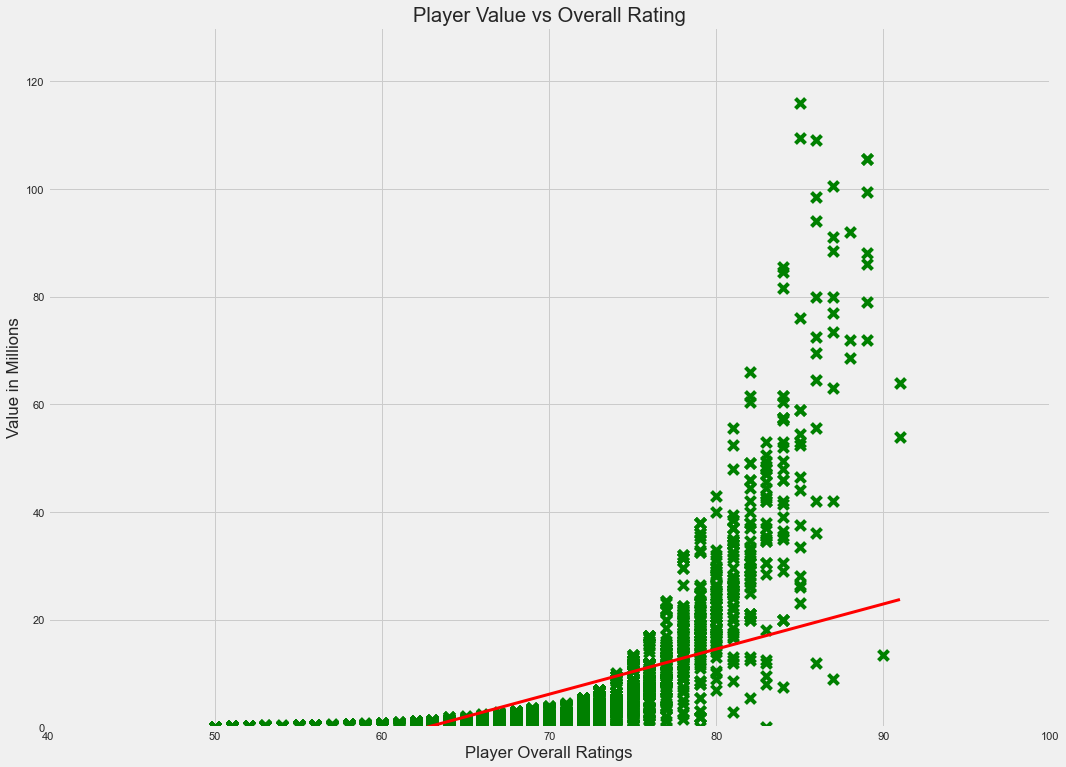

In [1444]:
#Supervised
#Linear Regression
X = fifa['Overall'].values.reshape(-1,1)
y = fifa['Value(M)'].values.reshape(-1,1)
reg = linear_model.LinearRegression().fit(X, y)
y_pred = reg.predict(X)
print('Coefficients: ', reg.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (16,12))
    plt.scatter(X, y, color = c, s = 100, marker = 'x')
    plt.plot(X, y_pred, color='red', linewidth=3)
    plt.title('Player Value vs Overall Rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Value in Millions')
    plt.xlabel('Player Overall Ratings')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'green')

Coefficients:  [[  0.         -10.60930886   0.08425581]]
Mean squared error: 25.86
Variance score: 0.70


Text(50, 105, 'Goalkeeper')

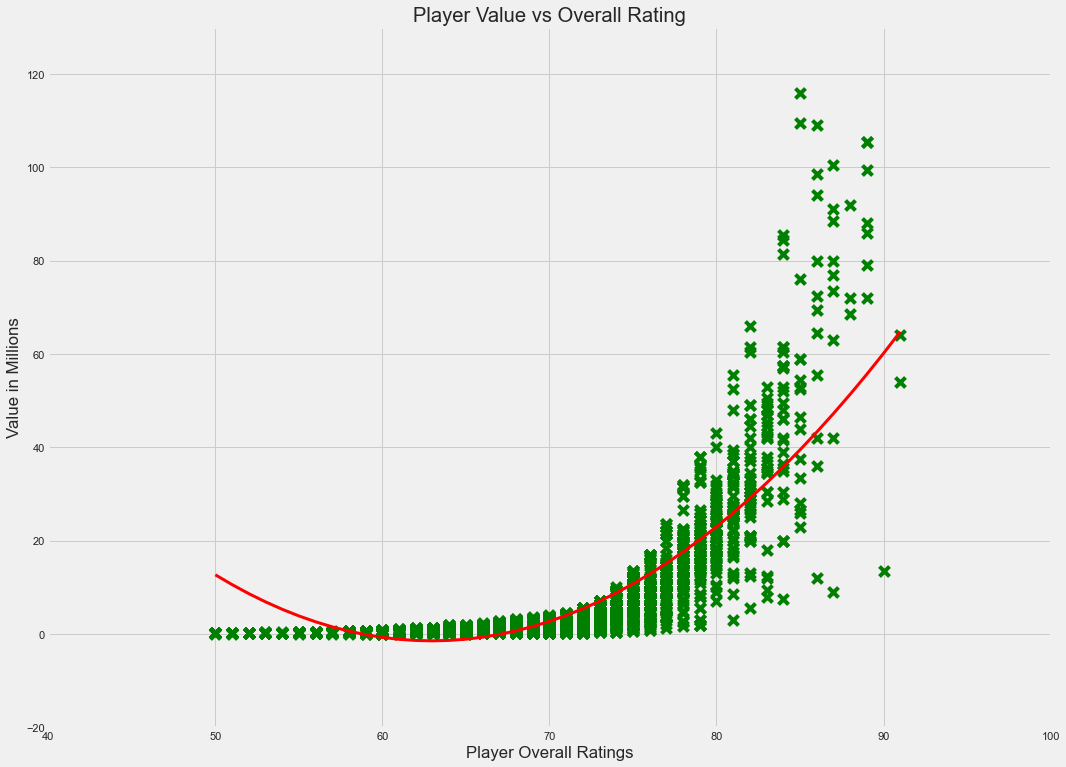

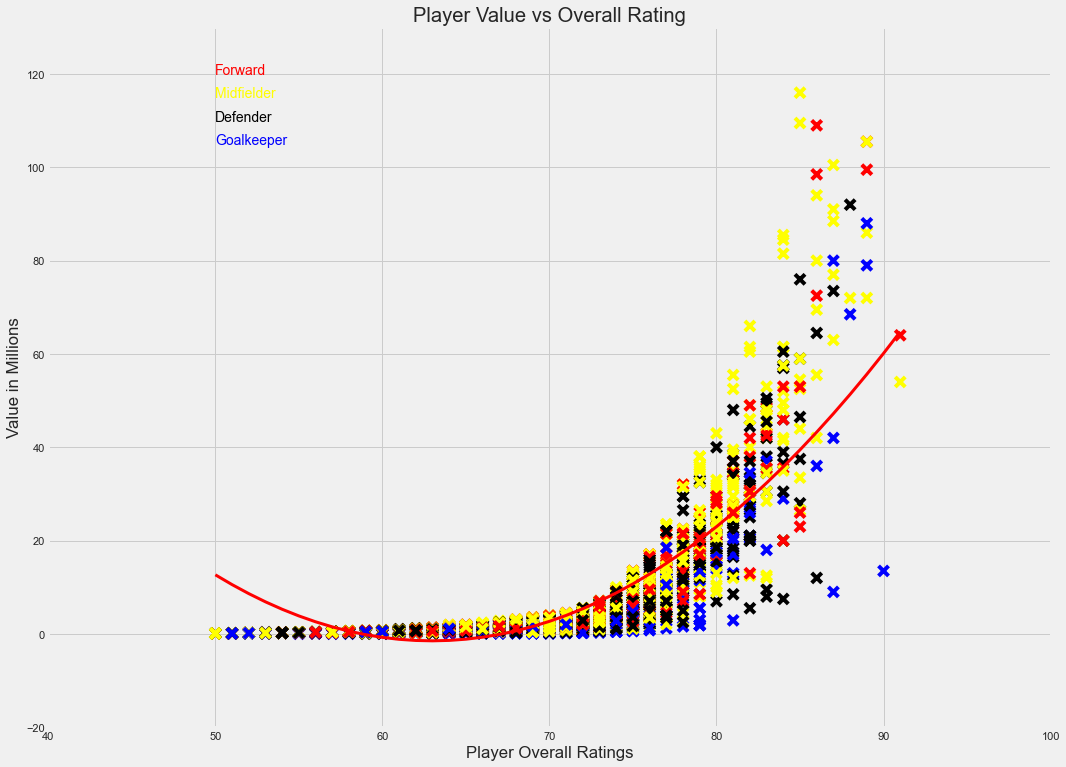

In [1445]:
#Polynomial Regression
fifa_2 = fifa[fifa['Value(M)'] != 0]
X_2 = fifa_2['Overall'].values.reshape(-1,1)
y_2 = fifa_2['Value(M)'].values.reshape(-1,1)

poly = PolynomialFeatures(degree=2)
X_2_p = poly.fit_transform(X_2)
reg1 = linear_model.LinearRegression().fit(X_2_p, y_2)
y_2_pred = reg1.predict(X_2_p)

print('Coefficients: ', reg1.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_2, y_2_pred))
print('Variance score: %.2f'% r2_score(y_2, y_2_pred))

color_dict = {'ST': 'red', 'CF': 'red', 'LW': 'red', 'RW': 'red',
              'LM': 'yellow', 'RM': 'yellow', 'CM': 'yellow', 'CAM': 'yellow', 'CDM': 'yellow',
              'LB': 'black', 'RB': 'black', 'CB': 'black', 'LWB': 'black', 'RWB': 'black',
              'GK': 'blue'}

c = fifa_2['Position'].map(color_dict)

plot_chart(X_2, y_2, y_2_pred, 40, 100, -20, 130, 'green')

# by positions
plot_chart(X_2, y_2, y_2_pred, 40, 100, -20, 130, c)
plt.text(50, 120, 'Forward', color = 'red')
plt.text(50, 115, 'Midfielder', color = 'yellow')
plt.text(50, 110, 'Defender', color = 'black')
plt.text(50, 105, 'Goalkeeper', color = 'blue')

11

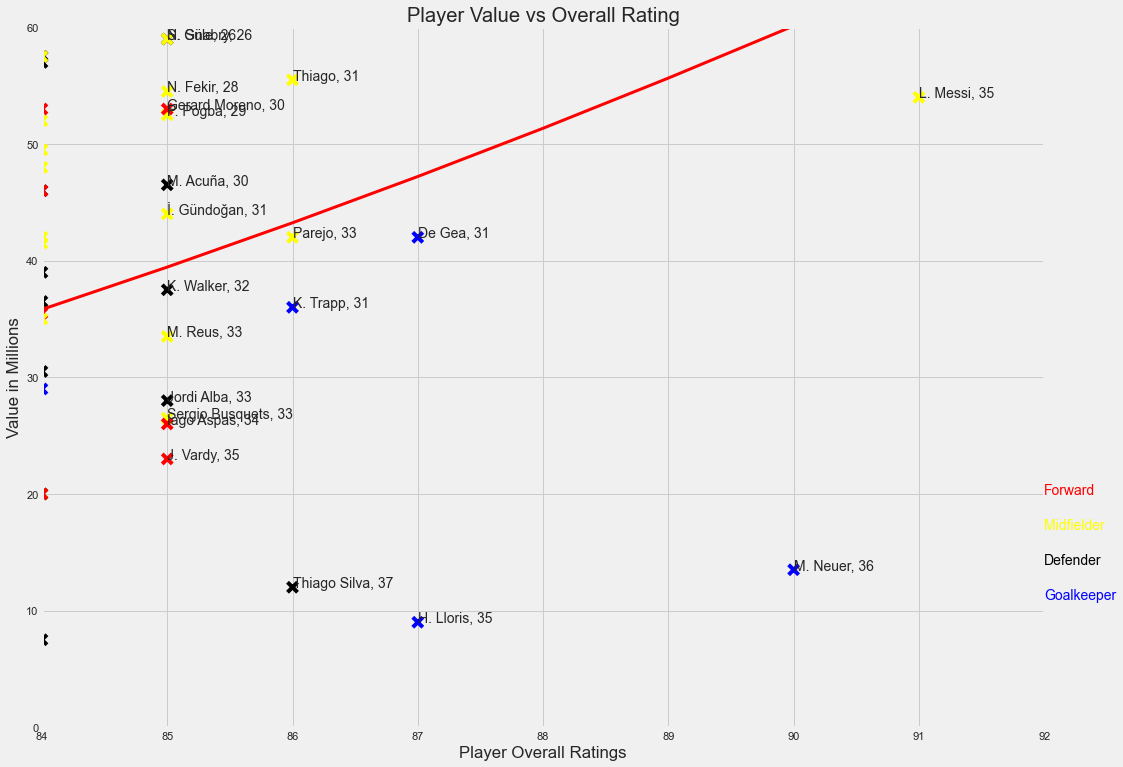

In [1446]:
#Adding Age and Name
x_low = 84
y_max = 60
plot_chart(X_2, y_2, y_2_pred, x_low, 92, 0, y_max, c)
plt.text(92, 20, 'Forward', color = 'red')
plt.text(92, 17, 'Midfielder', color = 'yellow')
plt.text(92, 14, 'Defender', color = 'black')
plt.text(92, 11, 'Goalkeeper', color = 'blue')
ax = plt.gca()
text=[]
for index, row in fifa_2.iterrows():
    if row['Overall'] > x_low and row['Value(M)'] < y_max:
        ax.text(row['Overall'], row['Value(M)'], '{}, {}'.format(row['Name'],row['Age']))
adjust_text(text)

In [1447]:
fifaun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [1405]:
#Unsupervised

In [1448]:
#Using only Brazil and France
fifaun = fifaun[(fifaun.Nationality =='Brazil')| (fifaun.Nationality=='France')]
fifaun = fifaun[fifaun.Overall>=84]
fifaun = fifaun.drop_duplicates(subset=['Known As'])
dict = {'Known As': 'Name'}
fifaun.rename(columns = dict, inplace = True)
fifaun.head()

,Name,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
11,Neymar Jr,Neymar da Silva Santos Jr.,89,89,99500000,LW,LW,Brazil,https://cdn.sofifa.net/players/190/871/23_60.png,30,...,89,85,89,69,66,69,64,53,64,23
13,Casemiro,Carlos Henrique Venancio Casimiro,89,89,86000000,CDM,CDM,Brazil,https://cdn.sofifa.net/players/200/145/23_60.png,30,...,76,84,76,83,89,83,84,89,84,24
16,Ederson,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,https://cdn.sofifa.net/players/210/257/23_60.png,28,...,47,52,47,40,47,40,39,38,39,90


In [1449]:
names = fifaun['Name'].tolist()

In [1450]:
fifaun[:3]

,Name,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
11,Neymar Jr,Neymar da Silva Santos Jr.,89,89,99500000,LW,LW,Brazil,https://cdn.sofifa.net/players/190/871/23_60.png,30,...,89,85,89,69,66,69,64,53,64,23


In [1451]:
#Normalising player stats based on their Nationality
fifaun = fifaun.groupby('Nationality').transform(lambda x: (x - x.mean()) / x.std())

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\94515044.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\94515044.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\94515044.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.

C:\Users\Lalith\AppData\Local\Temp\ipykernel_12088\94515044.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transf

In [1452]:
fifaun[:3]

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,1.989970,1.033342,-0.086475,1.629754,0.522015,0.663241,0.613774,0.109793,3.051561,0.068815,...,0.760959,0.657461,0.760959,-0.172579,-0.171394,-0.172579,-0.295960,-0.337721,-0.295960,-0.338234
4,1.989970,2.411132,3.069043,-1.086503,0.143133,-0.620451,0.736310,0.836367,0.883606,3.149773,...,0.952262,0.657461,0.952262,0.026551,-0.240878,0.026551,-0.108380,-0.392192,-0.108380,-0.338234
11,0.859203,-0.192450,0.758512,0.379869,-1.647472,-1.585505,0.715881,-0.345837,0.411186,0.507844,...,1.087410,0.787663,1.087410,-0.011507,-0.306246,-0.011507,-0.221557,-0.621661,-0.221557,-0.446482


In [1453]:
from sklearn import preprocessing

In [1454]:
#Scaling
x = fifaun.values 
min_max_scaler = preprocessing.MinMaxScaler()  
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [1455]:
#Principal Component Analysis
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [1456]:
#KMeans
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

C:\Users\Lalith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [1457]:
clusters_fifa = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [1458]:
clusters_fifa

,num_clusters,cluster_errors
0,1,102.551348
1,2,33.761214
2,3,8.274077
3,4,4.822493
4,5,3.474398
5,6,2.355815
6,7,1.550792
7,8,1.130299
8,9,0.803796
9,10,0.620705


Text(0, 0.5, 'Sum of squared errors')

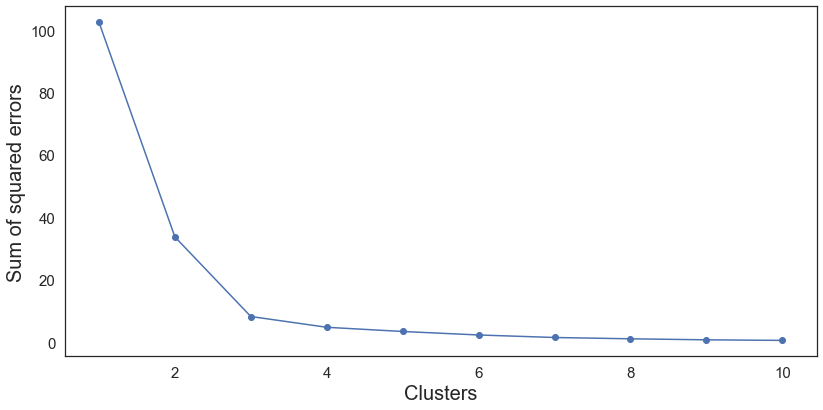

In [1459]:
#Plot Elbow
sns.set(style="white")
plt.figure(figsize=(12,6))
plt.plot( clusters_fifa.num_clusters, clusters_fifa.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

In [1460]:
#3 clusters
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [1461]:
transformed['cluster'] = clusters

In [1462]:
transformed['Name'] = names

In [1463]:
transformed.columns = ['x','y','cluster','Name']

In [1422]:
transformed[:3]

,x,y,cluster,Name
0,-0.821478,-1.064129,1,K. Benzema
1,-1.049248,-1.431150,1,K. Mbappé
2,-1.492198,-1.894846,1,Neymar Jr


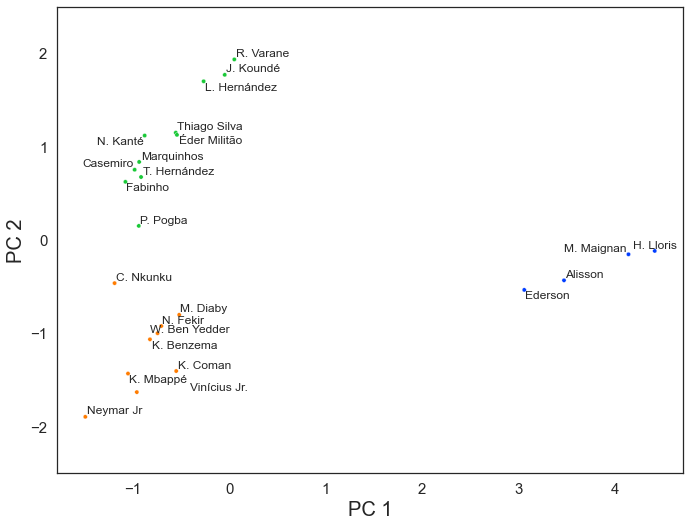

In [1464]:
plt.figure(figsize=(10,8))
sns.set(style='white')
ax =  sns.scatterplot(x='x', y='y',hue='cluster', data=transformed,  legend = False, size = 8, palette = 'bright')

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.Name):
    texts.append(plt.text(x, y, s))
adjust_text(texts) 
ax.set(ylim=(-2.5, 2.5))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)
plt.show()
